# Función transferencia pasabanda de segundo orden
<img src="./img/logo_UTN.svg" align="right" width="150" /> 

#### Por Mariano Llamedo Soria

### Resumen 
En este documento se presenta un ejemplo de **análisis numérico y circuital** para un filtro pasabajo simple de segundo orden.

Se usarán algunas funciones de PyTC2 para realizar los cálculos y presentar los resultados.

* Análisis de la respuesta en frecuencia: [analyze_sys](https://pytc2.readthedocs.io/en/latest/autoapi/pytc2/sistemas_lineales/index.html#pytc2.sistemas_lineales.analyze_sys), [bodePlot](https://pytc2.readthedocs.io/en/latest/autoapi/pytc2/sistemas_lineales/index.html#pytc2.sistemas_lineales.bodePlot), [pzmap](https://pytc2.readthedocs.io/en/latest/autoapi/pytc2/sistemas_lineales/index.html#pytc2.sistemas_lineales.pzmap), [pretty_print_bicuad_omegayq](https://pytc2.readthedocs.io/en/latest/autoapi/pytc2/sistemas_lineales/index.html#pytc2.sistemas_lineales.pretty_print_bicuad_omegayq)
* De presentación algebraica: [print_latex](https://pytc2.readthedocs.io/en/latest/autoapi/pytc2/general/index.html#pytc2.general.print_latex), [a_equal_b_latex_s](https://pytc2.readthedocs.io/en/latest/autoapi/pytc2/general/index.html#pytc2.general.a_equal_b_latex_s)
* Dibujo de redes: [dibujar_elemento_derivacion](https://pytc2.readthedocs.io/en/latest/autoapi/pytc2/dibujar/index.html#pytc2.dibujar.dibujar_elemento_derivacion), [dibujar_puerto_entrada](https://pytc2.readthedocs.io/en/latest/autoapi/pytc2/dibujar/index.html#pytc2.dibujar.dibujar_puerto_entrada),  [dibujar_espacio_derivacion](https://pytc2.readthedocs.io/en/latest/autoapi/pytc2/dibujar/index.html#pytc2.dibujar.dibujar_espacio_derivacion), [dibujar_elemento_serie](https://pytc2.readthedocs.io/en/latest/autoapi/pytc2/dibujar/index.html#pytc2.dibujar.dibujar_elemento_serie),  [dibujar_puerto_salida](https://pytc2.readthedocs.io/en/latest/autoapi/pytc2/dibujar/index.html#pytc2.dibujar.dibujar_puerto_salida)


### Introducción

La función transferencia de un resonador, o filtro pasabanda de 2do orden como seguramente habrás visto en TC1 es:

<img src="./img/bpf_pasivo.png" alt="Circuito RLC pasabanda" width="400px" style="display: block; margin: 0 auto;">


$$ H(s) = \frac{\frac{1}{R}}{\frac{1}{R} + sC + \frac{1}{sL} } = \frac{s\frac{1}{RC}}{s^2 + s\frac{1}{RC} + \frac{1}{LC}} $$

Buscaremos ahora una forma útil de parametrizar los polinomios de 2do orden, y en consecuencia las funciones transferencia. Será necesario que dichos parámetros guarden relación con aspectos concretos de la transferencia, como ser el ancho de banda y la frecuencia central del filtro. Se propone entonces la siguiente parametrización:

$$ T(s) = \frac{s \cdot \omega_0 / Q}{s^2 + s \cdot \omega_0 / Q + \omega_0^2} $$

Siendo $\omega_0$ la pulsación natural de resonancia de la red. También nos referiremos a dicha pulsación como *frecuencia de resonancia, o de corte*. Si bien **no** es una frecuencia, en la jerga se usa de forma indistinta dado que solo media el factor de proporcionalidad $ 2 \pi $ entre ambas ($\omega_0 = 2\pi*f_0$).
Respecto al parámetro Q, veremos que está relacionado con el ancho de banda del filtro $ Q = \omega_0/B$. Para ello primero calcularemos el módulo de la respuesta en frecuencia del filtro.

Primero substituimos $ s = j\omega $:

$$ T(j\omega) = \frac{j\omega \cdot \omega_0 / Q}{(j\omega)^2 + j\omega \cdot \omega_0 / Q + \omega_0^2} $$

$$ T(j\omega) = \frac{j\omega \cdot \omega_0 / Q}{\omega_0^2 - \omega^2 + j\omega \cdot \omega_0 / Q} $$

y calculamos el módulo:

$$ |T(j\omega)| = \frac{\omega \cdot \omega_0 / Q}{\sqrt{(\omega_0^2 - \omega^2 )^2 + \left(\frac{\omega \cdot \omega_0}{Q}\right)^2}} $$

Esta función la podemos observar fácilmente en LTspice cuando analizamos la respuesta en frecuencia:


<img src="./img/bpf_respuesta_freq.svg" alt="Circuito RLC pasabanda" style="display: block; margin: 0 auto;">


Como se puede ver en la respuesta de módulo, las pulsaciones $\omega_{1}$ y $\omega_{2}$ delimitan la banda de paso. Como es un pasabanda que en $\omega_0 = 2\pi.1\ \mathrm{Hz}$ tiene 0 dB, o $ |T(j\omega_0)| = 1 $, los límites de la banda de paso tendrán una ganancia de $ |T(j\omega_{1})| = |T(j\omega_{2})| = \sqrt{2}/2 $:

$$ |T(j\omega)| = \frac{\omega \cdot \omega_0 / Q}{\sqrt{(-\omega^2 + \omega_0^2)^2 + \left(\frac{\omega \cdot \omega_0}{Q}\right)^2}} = \frac{\sqrt{2}}{2} $$

Entonces despejamos los posibles valores de $ \omega $



$$ \left( \frac{\omega \cdot \omega_0 / Q}{\sqrt{(-\omega^2 + \omega_0^2)^2 + \left(\frac{\omega \cdot \omega_0}{Q}\right)^2}} \right)^2 = \left( \frac{\sqrt{2}}{2} \right)^2 $$

$$ \frac{(w \cdot \omega_0 / Q)^2}{(-w^2 + \omega_0^2)^2 + \left(\frac{w \cdot \omega_0}{Q}\right)^2} = \frac{1}{2} $$

Llegando a una ecuación cuadrática en $ \omega^2 $

$$ 0 = \omega^4 - \left(2\omega_0^2 + \frac{\omega_0^2}{Q^2}\right) \omega^2 + \omega_0^4 $$

Si $ x = \omega^2 $, entonces la ecuación cuadrática resulta:

$$ 0 = x^2 - \left(2\omega_0^2 + \frac{\omega_0^2}{Q^2}\right)x + \omega_0^4 $$

La solución para $\omega$ es:

$$ \omega_{1,2} = \frac{\omega_0(\sqrt{1 + 4Q^2} \pm 1)}{2Q} $$

Dichas frecuencias definen la banda de paso del filtro y cumplen con las siguientes restricciones:

$$ \omega_0^2 = \omega_1^2 . \omega_2^2 $$

$$ \omega_0/Q = B = \omega_2 - \omega_1 $$

Para el caso de nuestra simulación tendremos:

$$ \omega_{1,2} = \frac{2\pi\sqrt{5} \pm 1}{2} = 2\pi(1.118 \pm 0.5) = 2\pi.(0.618; 1.618)$$

$$ f_{1,2} = (0.618; 1.618) $$

Como se puede ver, ambas frecuencias **no** están equidistantes de $f_0 = 1$ Hz de forma euclídea, lo que equivaldría a que 1 Hz sea la media aritmética. En su lugar, $f_0$ es la media *geométrica*, que sería equivalente a la media aritmética, **solo** si el eje de frecuencias está *logaritmado*. Esto se suele prestar a confusión, dado que esa es la forma habitual de representar los ejes de frecuencia, como en la gráfica producida en LTspice.

Por último, diremos que el análisis en LTspice de la respuesta en frecuencia será considerado de ahora en adelante como **simulación circuital**, un paso importante en la simulación computacional de cualquier red eléctrica que analicemos.

## Simulación numérica de la transferencia

La simulación numérica consiste en simular el comportamiento de las expresiones matemáticas que modelan el comportamiento de un circuito, utilizando las capacidades de cálculo que brindan los módulos **Numpy** y **SciPy**. En el caso de este ejemplo, nos centraremos en analizar el comportamiento de la función *módulo*, *fase* y *retardo* de $T(s)$:

$$ T(s) = \frac{P(s)}{Q(s)} = \frac{s \cdot \omega_0 / Q}{s^2 + s \cdot \omega_0 / Q + \omega_0^2} $$

Todas las simulaciones comienzan con la inicialización y configuración de módulos numéricos y gráficos.

In [1]:
# Módulos externos

import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt

# módulo de SciPy
from scipy import signal as sig

# Esta parte de código la agregamos SOLO en los notebooks para fijar el estilo de los gráficos.
fig_sz_x = 13
fig_sz_y = 7
fig_dpi = 80 # dpi
fig_font_size = 13

mpl.rcParams['figure.figsize'] = (fig_sz_x, fig_sz_y)
mpl.rcParams['figure.dpi'] = fig_dpi
plt.rcParams.update({'font.size':fig_font_size})

Ahora importamos las funciones de **PyTC2**

In [2]:

from pytc2.sistemas_lineales import analyze_sys, bodePlot, pzmap, pretty_print_bicuad_omegayq
from pytc2.general import print_latex, a_equal_b_latex_s


Luego se procede a la simulación propiamente dicha

In [3]:
# Comienzo de la simulación

# Utilizaremos un Q diferente para facilitar la explicación que prosigue,
# luego adoptaremos Q unitario.
Q = np.sqrt(2)/2
# Prestar atención a que no es 1 Hz sino 1 rad/s
w0 = 1

# Cargamos la funcion transferencia T(s) como vectores de los coeficientes
# numerador y denominador P(s) (num) y Q(s) (den)
num = np.array([ w0 / Q, 0 ])
den = np.array([ 1., w0 / Q, w0**2 ])

H1 = sig.TransferFunction( num, den )

# mostramos la transferencia construida
display(H1)

TransferFunctionContinuous(
array([1.41421356, 0.        ]),
array([1.        , 1.41421356, 1.        ]),
dt: None
)

Como se puede observar, luego de cargar el objeto *TransferFunction*, no es fácil volver a identificar los parámetros $\omega_0 = 1$ y $Q = \sqrt{2}/2$ que lo originaron. Para ello se utilizará una función creada para tal fin de poder manifestar dicha parametrización:

$$ T(s) = \frac{s \cdot \omega_0 / Q}{s^2 + s \cdot \omega_0 / Q + \omega_0^2} = \frac{s \cdot B}{s^2 + s \cdot B + \omega_0^2} $$


In [4]:
pretty_print_bicuad_omegayq(num,den)

# o un poco mejor, presentarlo como una ecuación:
print_latex(a_equal_b_latex_s('H_d(s)', pretty_print_bicuad_omegayq(num, den, displaystr=False)))


<IPython.core.display.Math object>

<IPython.core.display.Math object>

De esta manera la comparación visual de la expresión se ve facilitada. Veremos que esta función nos será de gran utilidad a lo largo del curso. 

Continuando con el análisis realizamos la simulación numérica de $T(s)$, ya con $Q=1$ como se analizó al comienzo.

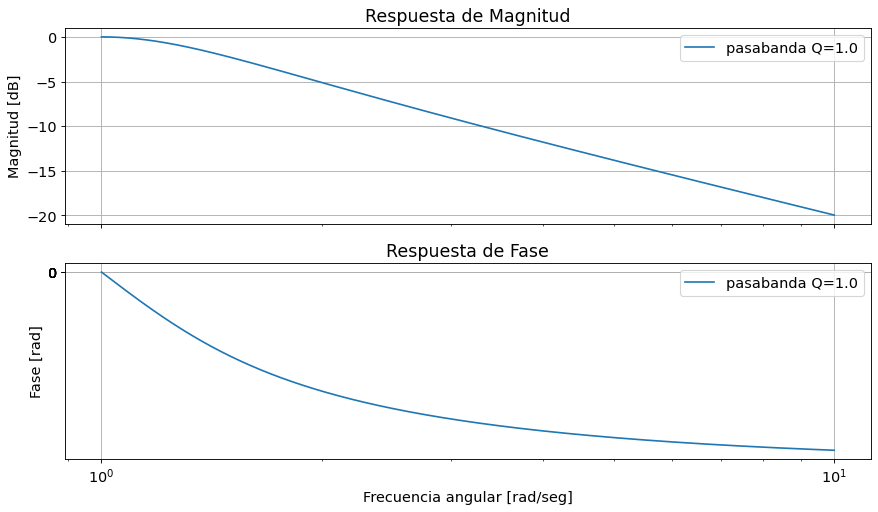

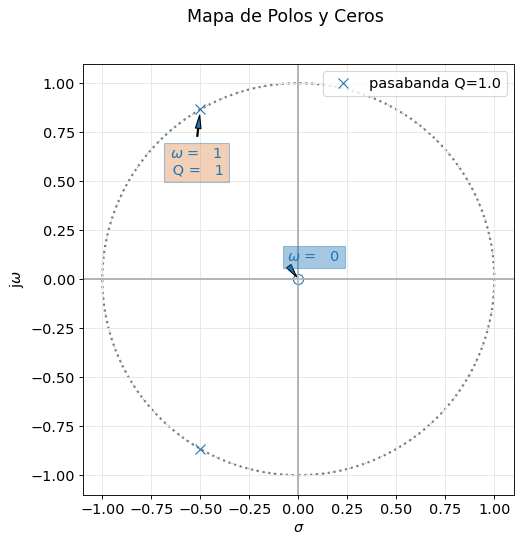

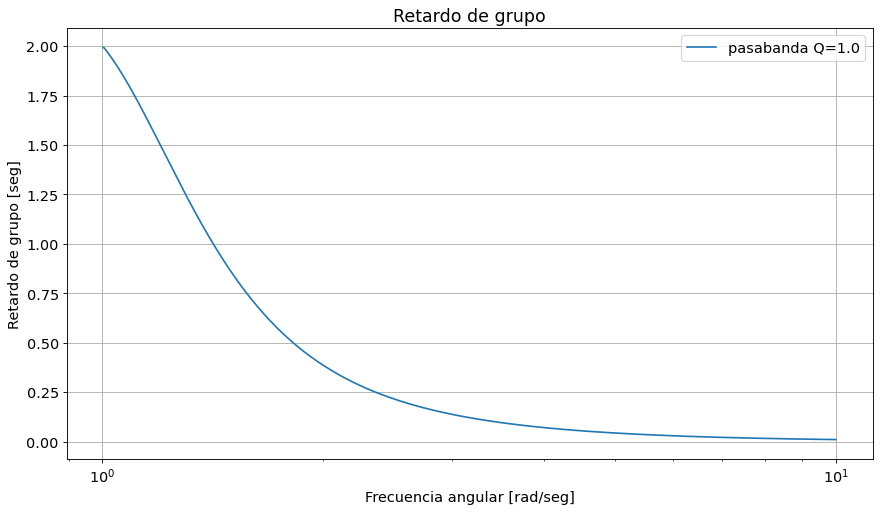

In [5]:
Q = 1
w0 = 1
num = np.array([ w0 / Q, 0 ])
den = np.array([ 1., w0 / Q, w0**2 ])

H1 = sig.TransferFunction( num, den )

_ = analyze_sys([H1], sys_name='pasabanda Q={:3.1f}'.format(Q))

ciertamente *analyze_sys* extiende el análisis de la respuesta en frecuencia al calcular el *retardo de grupo*; como también incorpora información al *diagrama de polos y ceros*, acerca del  $\omega_0$ y $Q$ asociado a cada  par de singularidades complejas conjugadas. Esto se puede justificar matemáticamente de manera muy sencilla mediante la factorización del polinomio:

$$ P(s) = s^2 + s \cdot \omega_0 / Q + \omega_0^2 = (s - \alpha + j \beta) \cdot (s - \alpha - j \beta)$$

<img src="./img/bpf_respuesta_pzmap.svg" alt="Circuito RLC pasabanda" style="display: block; margin: 0 auto;">


siendo $\alpha$ y $\beta$ las coordenadas real e imaginarias en el plano complejo de sendas singularidades.

$$ = s^2 + s (2\alpha) + ( \alpha^2 + \beta^2) $$

Igualando los coeficientes se obtiene

$$ \omega_0^2 = \alpha^2 + \beta^2 $$

$$ 2\alpha = \frac{\omega_0}{Q} $$

por lo que se desprende que el radio de las singularidades será $\omega_0$, y el ángulo $\psi$ que subtiende será

$$  \cos(\psi) = \frac{\omega_0}{\alpha} $$

por lo tanto

$$  Q = \frac{1}{2\cos(\psi)} $$

De esto se desprende la utilidad de la parametrización propuesta, ya que el $\omega_0$ se relaciona con el radio de las singularidades y el $Q$ con la cercanía al $j\omega$. 

Por todo lo antedicho, se sugiere el uso de *analyze_sys* y será la **función de referencia de ahora en adelante**.

### Resumen y conclusiones

Habiendo realizado un análisis introductorio de la transferencia pasabanda de segundo orden, y la red pasiva que la implementa, dejamos algunas conclusiones:

- La parametrización de los polinomios de segundo orden en término de $\omega_0$ y $Q$ resultan útiles. En el diagrama de polos y ceros, se puede decir que el radio de las raíces será $\omega_0$, y la cercanía al eje $j\omega$ es inversamente proporcional al $Q$.
- En lo que respecta a la respuesta de módulo, $\omega_0$ será el centro de la banda de paso, mientras que el ancho de banda es inversamente proporcional al $Q$.
- Respecto a la respuesta de fase, $\omega_0$ es el punto medio en lo que respecta a la variación total de fase del sistema.

Por estas razones resulta indispensable comenzar a pensar cualquier transferencia de segundo orden en función de $\omega_0$ y $Q$.